In [1]:
!pip install findance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 602.7 kB/s eta 0:00:0000:0100:02


In [2]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
samsung = fdr.DataReader('005930', '2016')
print(samsung)

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2025-05-21  56200  56600  55700  55700   7794181 -0.003578
2025-05-22  55300  55500  54500  54700  15254278 -0.017953
2025-05-23  55000  55200  54100  54200  11247115 -0.009141
2025-05-26  53900  55000  53700  54700  10901337  0.009225
2025-05-27  54200  54500  54000  54050   4488872 -0.011883

[2306 rows x 6 columns]


In [4]:
openValues = samsung[['Open']]

In [5]:
# 특징값 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(openValues)

In [6]:
# 훈련 데이터와 테스트 데이터의 분리
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [7]:
# 순차 훈련 데이터를 생성
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [12]:
# LSTM 구축하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation = 'tanh',
               return_sequences=False)
         )
model.add(Dense(1))

In [16]:
# 모델 학습
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3982   
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3387e-04
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4649e-04
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6895e-04
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 10/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 11/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4490e-04
Epoch 12/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2653e-04
Epoch 13/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9002e-04
Epoch 14/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4862e-04


In [17]:
# 테스트셋을 이용하여 미래 주가 예측
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


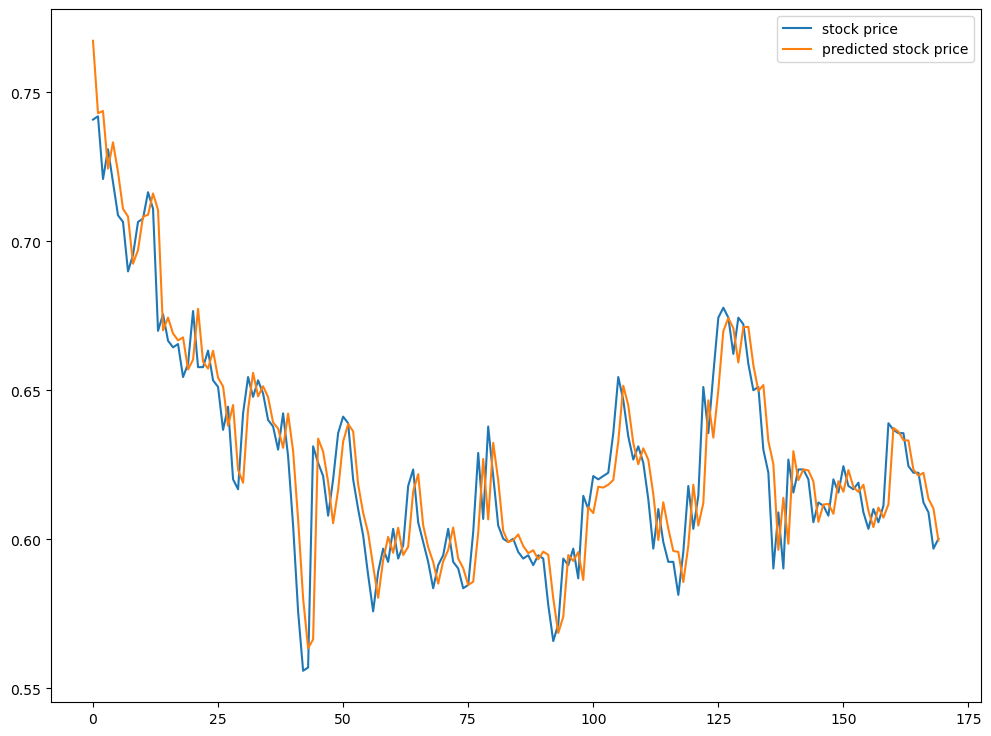

In [18]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()